<a href="https://colab.research.google.com/github/vallesda/Algorithms/blob/master/A01191310_Reto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Dra. María de la Paz Rico Fernández
### Dr. Juan Miguel Meza Méndez

### **David Valles A01191310**`

https://www.gob.mx/conagua/articulos/calidad-del-agua

# Limpieza, análisis, visualización y agrupamiento.


In [114]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Cargamos datos en un DF
path = 'sample_data/agua_subterranea.csv'
df = pd.read_csv(path)

# Limpieza de datos

In [ ]:
#Concluimos que la base de datos tiene 1068 entradas(Rows) y 57 featuree(Cols)
print(df.shape)
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Lista los nombres de las columnas
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
#Conteo de nulos
df.isnull().sum().sum()

1532

In [ ]:
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
#Imprime tipo de datos
print(df.dtypes)


CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

Importantes para determinar semaforo: Demanda Bioquímica de Oxígeno a cinco días (DBO5), Demanda Química de Oxígeno (DQO), Sólidos Suspendidos Totales (SST), Coliformes Fecales (CF), Escherichia coli, (E_COLI), Enterococos (ENTEROC), Porcentaje de Saturación de Oxigeno (OD%) y Toxicidad (TOX).



In [ ]:
#Removemos variables innecesarias 
df.drop('CLAVE', axis = 1, inplace = True)
df.drop('PERIODO', axis = 1, inplace = True)

In [ ]:
#Remueve toda la columna SDT_mg/L sin valores, y contaminantes
df.drop('SDT_mg/L', inplace=True, axis=1)
df.drop('CONTAMINANTES', inplace=True, axis=1)



De los 1068 datos tenemos una columna (SDT_mg/L) con todos sus valores vacios y una columna (CONTAMINANTES) con 434 nulos. 



La columna CONTAMINANTES continene un objeto con un string que representa una lista de sustancias en el agua. Considero que esta informacion no es relevante, ya que contamos con otras columnas de las cuales podemos derivar esta informacion.


In [ ]:
#Remueve filas con valores nulos de las variables numericas.
df.dropna(subset=["ALC_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_CONDUC"], axis=0, inplace=True)
df.dropna(subset=["SDT_M_mg/L"], axis=0, inplace=True)


In [ ]:
df.dropna(subset=["DUR_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_DUR"], axis=0, inplace=True)
df.dropna(subset=["N_NO3_mg/L"], axis=0, inplace=True)
df.dropna(subset=["CALIDAD_N_NO3"], axis=0, inplace=True)

In [ ]:
df.isna().sum()

SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CUMPLE_CON_A

In [ ]:
#Remueve '< y >' ademas de covertir a float.
to_float = [
  'SDT_M_mg/L',
  'FLUORUROS_mg/L',
  'DUR_mg/L',
  'COLI_FEC_NMP/100_mL',
  'N_NO3_mg/L',
  'AS_TOT_mg/L',
  'CD_TOT_mg/L',
  'CR_TOT_mg/L',
  'HG_TOT_mg/L',
  'PB_TOT_mg/L',
  'MN_TOT_mg/L',
  'FE_TOT_mg/L']

for var in to_float:
  df_string = df[var]
  for index in df_string.index:
      s = df_string[index]
      s = str(s)
      s = s.replace('>', '')
      s = s.replace('<', '')
      df_string[index] = s
  df[var] = df_string.astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
variables_categoricas = [
  'SITIO',
  'SUBTIPO',
  'CALIDAD_ALC',
  'CALIDAD_CONDUC',
  'CALIDAD_SDT_ra', 
  'CALIDAD_SDT_salin',
  'CALIDAD_FLUO',
  'CALIDAD_DUR',   
  'CALIDAD_COLI_FEC', 
  'CALIDAD_N_NO3',
  'CALIDAD_AS',
  'CALIDAD_CD',
  'CALIDAD_CR',
  'CALIDAD_HG',
  'CALIDAD_PB',
  'CALIDAD_FE',
  'CALIDAD_MN',
  "CUMPLE_CON_ALC",   
  "CUMPLE_CON_COND",       
  "CUMPLE_CON_SDT_ra",   
  "CUMPLE_CON_SDT_salin",  
  "CUMPLE_CON_FLUO",  
  "CUMPLE_CON_DUR",    
  "CUMPLE_CON_CF",     
  "CUMPLE_CON_NO3",        
  "CUMPLE_CON_AS",     
  "CUMPLE_CON_CD",       
  "CUMPLE_CON_CR",       
  "CUMPLE_CON_HG",       
  "CUMPLE_CON_PB",       
  "CUMPLE_CON_MN",       
  "CUMPLE_CON_FE",
  "ORGANISMO_DE_CUENCA",
  "ESTADO",
  "MUNICIPIO",
  "ACUIFERO",
  'SEMAFORO'
]
 
le = LabelEncoder()
for var in variables_categoricas:
  label = le.fit_transform(df[var])
  df[var] = label

In [ ]:
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,854,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.02210 22.20887)
1,817,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.20075 21.99958)
2,594,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,1,0,1,1,1,1,1,1,POINT (-102.28801 22.36685)
3,655,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.29449 22.18435)
4,938,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,1,0,1,1,1,1,1,1,1,POINT (-110.24480 23.45138)


In [ ]:
"""
otro modo de cambiar variables binarias
categoricas_binarias = [
  "CUMPLE_CON_ALC",   
  "CUMPLE_CON_COND",       
  "CUMPLE_CON_SDT_ra",   
  "CUMPLE_CON_SDT_salin",  
  "CUMPLE_CON_FLUO",  
  "CUMPLE_CON_DUR",    
  "CUMPLE_CON_CF",     
  "CUMPLE_CON_NO3",        
  "CUMPLE_CON_AS",     
  "CUMPLE_CON_CD",       
  "CUMPLE_CON_CR",       
  "CUMPLE_CON_HG",       
  "CUMPLE_CON_PB",       
  "CUMPLE_CON_MN",       
  "CUMPLE_CON_FE"]


for feature in categoricas_binarias:
  df[feature].replace(['NO', 'SI'],
                        [0, 1], inplace=True)
"""

# Analisis de datos

Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 

In [ ]:
#MEAN MG
avg_ALC = df["ALC_mg/L"].astype("float").mean()
print("Average of ALC_mg/L: ", avg_ALC)

Average of ALC_mg/L:  235.7191242937853


In [ ]:
#MEAN MS conduct
avg_CONDUCT = df["CONDUCT_mS/cm"].astype("float").mean()
print("Average of CONDUCT_mS/cm: ", avg_CONDUCT)

Average of CONDUCT_mS/cm:  1140.0840566037737


In [ ]:
# Aqui podemos identificar tendencias y medidas como: promedio, media, mediana, cuartiles, outliers y dispersion
df.describe()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1062.000000,1066.000000,...,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,531.484991,5.945591,16.398687,218.345216,144.460600,4.946529,-101.892448,23.167574,235.719124,0.674484,...,0.787992,0.942777,0.923077,0.880863,0.998124,0.985929,0.999062,0.988743,0.919325,0.872420
std,307.474587,3.701395,9.981935,122.030024,74.601771,0.435461,6.707681,3.887473,116.963657,1.195471,...,0.408922,0.232378,0.266594,0.324102,0.043294,0.117840,0.030628,0.105550,0.272464,0.333778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-116.664250,14.561150,26.640000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,265.250000,2.000000,9.000000,125.250000,88.250000,5.000000,-105.391975,20.217192,164.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,531.500000,6.000000,15.000000,211.500000,153.000000,5.000000,-102.174180,22.617190,215.767500,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,797.750000,10.000000,25.000000,312.750000,205.750000,5.000000,-98.980873,25.511575,292.930000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1063.000000,12.000000,31.000000,450.000000,272.000000,7.000000,-86.864120,32.677713,1650.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#MEAN
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


SITIO                    531.484991
ORGANISMO_DE_CUENCA        5.945591
ESTADO                    16.398687
MUNICIPIO                218.345216
ACUIFERO                 144.460600
SUBTIPO                    4.946529
LONGITUD                -101.892448
LATITUD                   23.167574
ALC_mg/L                 235.719124
CALIDAD_ALC                0.674484
CONDUCT_mS/cm           1140.084057
CALIDAD_CONDUC             2.049719
SDT_M_mg/L               897.079953
CALIDAD_SDT_ra             1.855535
CALIDAD_SDT_salin          0.984991
FLUORUROS_mg/L             1.077197
CALIDAD_FLUO               1.446529
DUR_mg/L                 348.150480
CALIDAD_DUR                1.125704
COLI_FEC_NMP/100_mL      356.155253
CALIDAD_COLI_FEC           3.086304
N_NO3_mg/L                 4.320790
CALIDAD_N_NO3              1.661351
AS_TOT_mg/L                0.019636
CALIDAD_AS                 1.646341
CD_TOT_mg/L                0.003030
CALIDAD_CD                 0.998124
CR_TOT_mg/L                0

AQUI AGREGAR CHARTS Y BOXPLOT

> **Bloque con sangría**



In [ ]:
Y = df[['SEMAFORO']]

In [ ]:
Y.describe()

,SEMAFORO
count,1066.000000
mean,1.173546
std,0.779367
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
#Creamos un nuevo DF con latitud y longitud para generar una nueva columna de coordenadas
latlong=df[["LONGITUD","LATITUD"]]

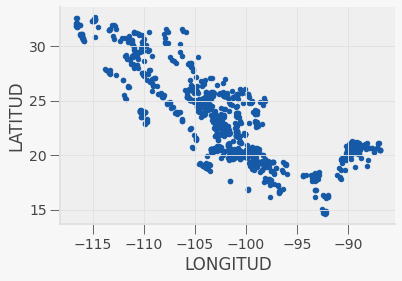

In [ ]:
latlong.plot.scatter( "LONGITUD","LATITUD")

In [115]:
# Pearson correlation matrix
df.corr()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
SITIO,1.000000,-0.106639,-0.160417,0.196665,0.111432,0.101354,-0.049556,-0.041816,0.018375,0.009613,...,0.026635,0.037685,-0.027265,0.013367,0.037664,0.000577,0.021186,0.025108,-0.052973,0.056139
ORGANISMO_DE_CUENCA,-0.106639,1.000000,-0.073316,-0.198316,0.094171,-0.072296,0.003213,0.257756,0.028374,-0.082520,...,-0.185672,-0.052748,0.010979,0.091648,0.040378,-0.025437,0.016114,0.084953,-0.001563,-0.020824
ESTADO,-0.160417,-0.073316,1.000000,0.111951,-0.104816,-0.058816,0.303126,-0.111726,0.056796,-0.110605,...,0.027168,0.106997,0.106451,0.126728,0.012596,-0.023165,-0.011061,0.008720,0.003552,0.025708
MUNICIPIO,0.196665,-0.198316,0.111951,1.000000,0.114501,0.029521,0.090542,-0.131190,0.017439,0.062335,...,0.011535,0.084306,-0.041870,0.023358,0.030869,-0.018141,-0.057946,0.003582,-0.048018,-0.029993
ACUIFERO,0.111432,0.094171,-0.104816,0.114501,1.000000,0.020731,-0.065157,0.058526,0.069313,0.053030,...,0.003173,0.054710,0.031621,-0.011204,0.014804,-0.039209,-0.041727,0.029994,-0.080027,0.006661
SUBTIPO,0.101354,-0.072296,-0.058816,0.029521,0.020731,1.000000,-0.155362,0.106167,-0.053019,0.040485,...,0.068104,0.062525,-0.035463,-0.045179,-0.005326,-0.014676,-0.003764,-0.013108,-0.020564,0.011163
LONGITUD,-0.049556,0.003213,0.303126,0.090542,-0.065157,-0.155362,1.000000,-0.760179,0.167198,-0.067566,...,-0.159873,0.107830,0.113653,0.135736,-0.034052,-0.079693,-0.021236,-0.012547,0.084944,-0.010631
LATITUD,-0.041816,0.257756,-0.111726,-0.131190,0.058526,0.106167,-0.760179,1.000000,-0.080197,-0.060475,...,-0.048497,-0.021024,-0.120643,-0.153635,0.036004,0.121432,0.038046,0.069722,0.032722,0.046617
ALC_mg/L,0.018375,0.028374,0.056796,0.017439,0.069313,-0.053019,0.167198,-0.080197,1.000000,-0.239757,...,-0.259995,-0.008939,-0.028541,-0.036653,-0.009800,0.012961,-0.031586,-0.039436,-0.170533,-0.061883
CALIDAD_ALC,0.009613,-0.082520,-0.110605,0.062335,0.053030,0.040485,-0.067566,-0.060475,-0.239757,1.000000,...,0.116077,0.081605,-0.010878,-0.022636,0.024473,0.027443,0.017297,0.037905,-0.005749,-0.085350


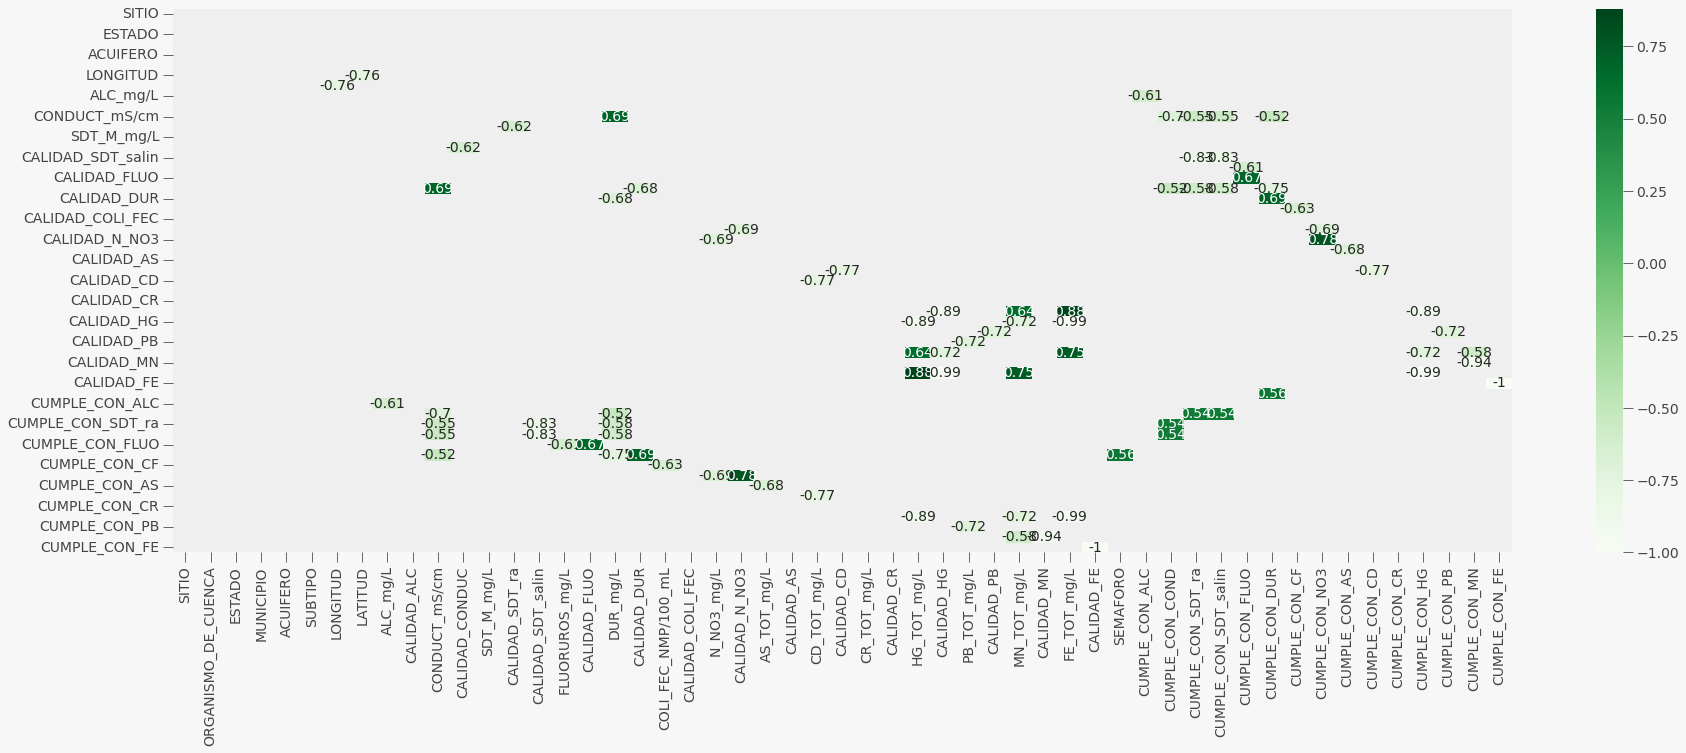

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Greens")
plt.show()

In [ ]:
""" PCA PARA LA SIGUIENTE ETAPA?"
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_agua = pca.fit_transform(df)

pca_df = pd.DataFrame(data=pca_agua, columns=['Componente 1', 'Componente 2'])
"""

# Visualización

In [ ]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,854,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.0221 22.20887)
1,817,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.20075 21.99958)
2,594,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,1,0,1,1,1,1,1,1,POINT (-102.28801 22.36685)
3,655,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.29449 22.18435)
4,938,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,1,0,1,1,1,1,1,1,1,POINT (-110.2448 23.45138)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,854,6,0,25,232,5,-102.02210,22.20887,229.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.02210 22.20887)
1,817,6,0,9,232,5,-102.20075,21.99958,231.990,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.20075 21.99958)
2,594,6,0,94,228,5,-102.28801,22.36685,204.920,0,...,1,1,0,1,1,1,1,1,1,POINT (-102.28801 22.36685)
3,655,6,0,284,228,5,-102.29449,22.18435,327.000,0,...,1,1,1,1,1,1,1,1,1,POINT (-102.29449 22.18435)
4,938,10,2,197,220,5,-110.24480,23.45138,309.885,0,...,1,0,1,1,1,1,1,1,1,POINT (-110.24480 23.45138)


In [116]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

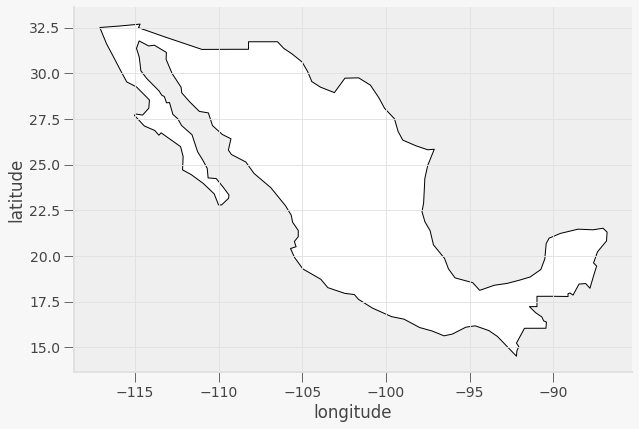

In [117]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

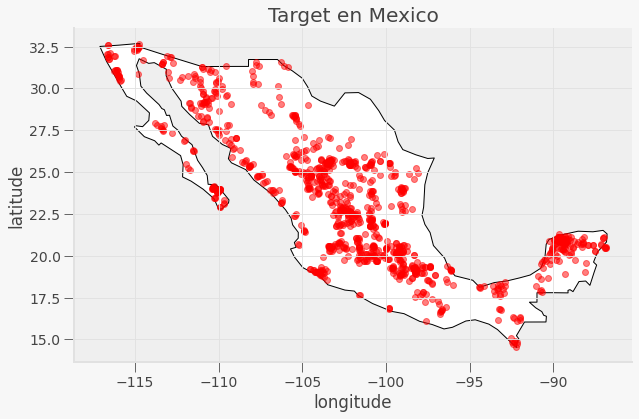

In [118]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

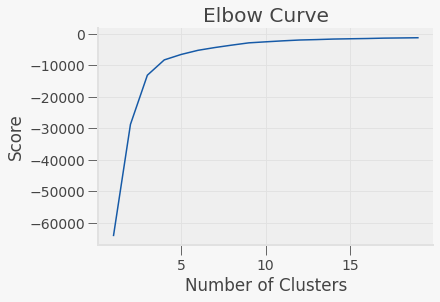

In [119]:
#Obtenemos numero de cluster optimo
X = latlong

#Curve
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Agrupamiento

In [121]:
#Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [122]:
y_kmeans

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)